<a href="https://colab.research.google.com/github/Blackman9t/Advanced-Data-Science/blob/master/data_visualization_of_big_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Visualization of Big Data

Since plotting more than 3 dimensions is hard, we'd learn how to reduce dimensionality as part of this course.<br>**Note that:**

In 2 dimensional space data boundaries can be defined through lines and circles.<br>
In 3 dimensional space as spheres and planes.<br>
In more than 3 dimensions as hyper-spheres and hyper-planes... These are multidimensional spheres and planes which cannot be visualised anymore, are hard to imagine, but still do the job to separate multidimensional point clouds in multi-dimensional vector space from each other.

### Plotting with Apache Spark and Python Matplotlib

One important aspect when plotting is on data size. Know that plotting libraries run on a single machine and expect a rather small input datsset in the form of matrcs, vectors, rows and columns

Too much data leads to either main memory problems or performance problems. The solution is sampling.

### Sampling:

Sampling takes only a subset of your original data, but due to inherent randomness in selecting the values, it preserves most properties of the original dataframe.<br>Sampling reduces computational costs because at downstream data processing steps, only a fraction of data has to be considered

### Let's install spark related dependencies

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://apache.osuosl.org/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz
!tar xf spark-2.4.4-bin-hadoop2.7.tgz

!pip install -q findspark
!pip install pyspark
# Set up required environment variables

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"

     |████████████████████████████████| 215.7MB 62kB/s 
     |████████████████████████████████| 204kB 47.8MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.4-py2.py3-none-any.whl size=216130387 sha256=9de7979b125a3fdcd253f803681a967cddfe966392fdfc284bf6d1bcedd628eb
  Stored in directory: /root/.cache/pip/wheels/ab/09/4d/0d184230058e654eb1b04467dbc1292f00eaa186544604b471
Successfully built pyspark


In [2]:
from pyspark import SparkConf, SparkContext
try:
    conf = SparkConf().setMaster("local").setAppName("My App")
    sc = SparkContext(conf = conf)
    print('SparkContext Initialised Successfully!')
except Exception as e:
    print(e)

SparkContext Initialised Successfully!


In [3]:
sc

<SparkContext master=local appName=My App>

### Next, we set up a spark session

In [4]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('My App').getOrCreate()
spark

Now it is time to grab a PARQUET file and create a dataframe out of it. Using SparkSQL you can handle it like a database.

In [5]:
!wget https://github.com/IBM/coursera/blob/master/coursera_ds/washing.parquet?raw=true
!mv washing.parquet?raw=true washing.parquet

--2020-01-20 10:10:39--  https://github.com/IBM/coursera/blob/master/coursera_ds/washing.parquet?raw=true
Resolving github.com (github.com)... 140.82.118.4
Connecting to github.com (github.com)|140.82.118.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/IBM/coursera/raw/master/coursera_ds/washing.parquet [following]
--2020-01-20 10:10:39--  https://github.com/IBM/coursera/raw/master/coursera_ds/washing.parquet
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/IBM/coursera/master/coursera_ds/washing.parquet [following]
--2020-01-20 10:10:40--  https://raw.githubusercontent.com/IBM/coursera/master/coursera_ds/washing.parquet
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP re

Now let's read the parquet file to a Spark DataFrame

In [6]:
df = spark.read.parquet('washing.parquet')
df.show()

+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|                 _id|                _rev|count|flowrate|fluidlevel|frequency|hardness|speed|temperature|           ts|voltage|
+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|0d86485d0f88d1f9d...|1-57940679fb8a713...|    4|      11|acceptable|     null|      77| null|        100|1547808723923|   null|
|0d86485d0f88d1f9d...|1-15ff3a0b304d789...|    2|    null|      null|     null|    null| 1046|       null|1547808729917|   null|
|0d86485d0f88d1f9d...|1-97c2742b68c7b07...|    4|    null|      null|       71|    null| null|       null|1547808731918|    236|
|0d86485d0f88d1f9d...|1-eefb903dbe45746...|   19|      11|acceptable|     null|      75| null|         86|1547808738999|   null|
|0d86485d0f88d1f9d...|1-5f68b4c72813c25...|    7|    null|      null|       75|    null| null|   

In [7]:
print("Shape of the Dataset is {} rows, {} columns.".format(df.count(), len(df.columns)))

Shape of the Dataset is 2058 rows, 11 columns.


In [8]:
# Let's see if the washing table is now part of the tables in our spark session
spark.catalog.listTables()

[]

So let's add the washing table to our spark session tables so that we can use spark.sql() commands and methods on it

In [0]:
df.createOrReplaceTempView('washing')

In [10]:
spark.catalog.listTables()

[Table(name='washing', database=None, description=None, tableType='TEMPORARY', isTemporary=True)]

Let's inspect the voltage column and select it's values except null values.

In [0]:
voltage_vec = spark.sql("select voltage from washing where voltage is not null")

In [12]:
print(voltage_vec.count(),'Rows.')
voltage_vec.show()

# this shows that of the 2048 rows in voltage columns, only 448 are not null or NaN.

448 Rows.
+-------+
|voltage|
+-------+
|    236|
|    235|
|    228|
|    236|
|    233|
|    226|
|    235|
|    220|
|    225|
|    239|
|    230|
|    236|
|    244|
|    235|
|    234|
|    224|
|    225|
|    223|
|    236|
|    226|
+-------+
only showing top 20 rows



In [13]:
voltage_vec.take(5)

[Row(voltage=236),
 Row(voltage=235),
 Row(voltage=228),
 Row(voltage=236),
 Row(voltage=233)]

This shows that the values are somehow wrapped in a row object. So let's get rid of those. As mentioned earlier, DataFrames are wrappers of the RDD, so we should now access the wrapped RDD in the RDD API inorder to extract the containing values in the row wrapper object.

In [0]:
voltage_vec = voltage_vec.rdd.map(lambda row: row.voltage)

In [15]:
# Let's see the first 10 numbers
voltage_vec.take(10)

[236, 235, 228, 236, 233, 226, 235, 220, 225, 239]

**Sampling the Data**
Let's now Sample this data.
This step is the most important. Imagine if this RDD has millions of rows of data. There is no way we can pass that volume to a plotting library, since plotting is only done on a single machine. So Sampling is the answer.

Let's use a random fraction of 10% in this case. But if we really have a lot of data, then 0.01 or 0.001 or even less percent will be appropriate.<br>
As a rule of thumb, not more than 100 data points should be plotted

In [16]:
sample_voltage_vec = voltage_vec.sample(False, 0.1).collect()  # We sample with just 10% of the data in this case.
sample_voltage_vec

[234,
 236,
 237,
 239,
 233,
 229,
 228,
 227,
 225,
 238,
 237,
 221,
 223,
 236,
 237,
 223,
 227,
 232,
 232,
 224,
 226,
 236,
 246,
 229,
 230,
 226,
 231,
 232,
 257,
 223,
 238,
 234,
 222,
 220,
 220,
 231]

This looks fine, the sampled data is the subset of all voltage values coming from the cloud and couchDB NOsql database.<br>
Now we have a meaningful array containing integer values reflecting the voltage of the power source of a washing machine in different points in time, accessible to a local spark driver in a python array...Let's plot it.

### Boxplots:

Boxplots show many statistical moments of your data at the same time:- mean, median, skew, standard deviation and outlier content. Boxplots tell us about the distribution of our data.

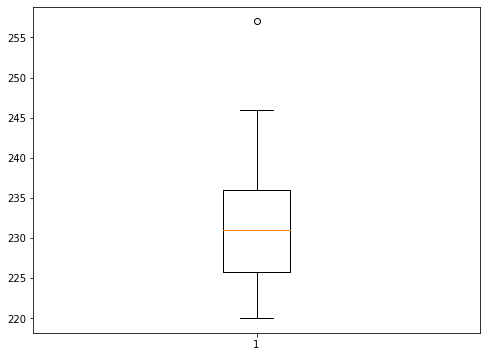

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.boxplot(sample_voltage_vec)
plt.show()

### Run Charts:

This is another way of visualizing data. Ideally Time-series data.
<br>Run charts are the default charts we may have seen for plotting stock market data. And guess what... Stock market data is a Time-series data, just as IOT sensor data.<br>Run charts always define the x-axis as time and it runs from the left to the right.<br>On the y-axis we can see the observed values over time. Sometimes also multiple values. Cos we could plot multiple dimensions using different colors, especially if the value ranges of each dimension are similar.

To create a Run chart we need to fetch an additional dimension from our data set, namely the time dimension.

In [0]:
# First we run the spark.sql select statement for the two cols we want to display.
time_volt_vec = spark.sql('select voltage,ts from washing where voltage is not null order by ts asc')
# Next we use the underlying rdd attribute to sample the data and choose the ts and voltage values.
result_array = time_volt_vec.rdd.sample(False,0.1).map(lambda row: (row.ts, row.voltage))

In [19]:
# Lets see the first 10 values
result_array.take(10)

[(1547808725914, 223),
 (1547808734922, 234),
 (1547808755932, 224),
 (1547808767938, 224),
 (1547808776948, 235),
 (1547808779950, 220),
 (1547808800960, 226),
 (1547808909090, 239),
 (1547808924097, 225),
 (1547808927099, 234)]

We've rightly received a list of tiples of timestamp(ts) and voltage values. Let's turn these into python arrays.

In [20]:
voltage_array = result_array.map(lambda ts_voltage: ts_voltage[1]).collect()
# Let's see the first 5 values
voltage_array[:5]

[223, 234, 224, 224, 235]

In [21]:
ts_array = result_array.map(lambda ts_voltage: ts_voltage[0]).collect()
# Let's see the first 5 values
ts_array[:5]

[1547808725914, 1547808734922, 1547808755932, 1547808767938, 1547808776948]

With our time stamp and voltage arrays, now we plot the Run chart.

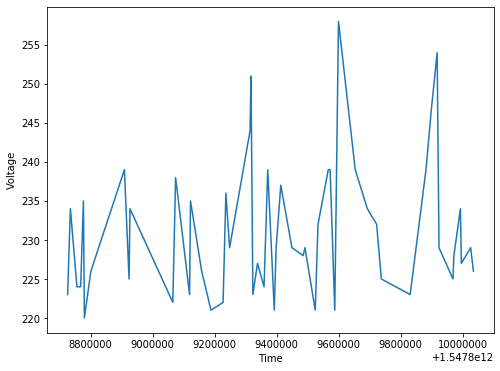

In [22]:
plt.figure(figsize=(8,6))
plt.plot(ts_array,voltage_array)
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.show()

But this time we want to only plot data worth of one hour. Therefore we first have to find out in which date range we have data available:

In [33]:
spark.sql("select min(ts), max(ts) from washing").show()

+-------------+-------------+
|      min(ts)|      max(ts)|
+-------------+-------------+
|1547808720911|1547810064867|
+-------------+-------------+



Now lets repeat the previous steps but only show data for hour. We've found out the low and high boundary of data available and we know that "ts" stand for "timestamp". Timestamp are the number of millisecons passed since the 1st of Jan. 1970

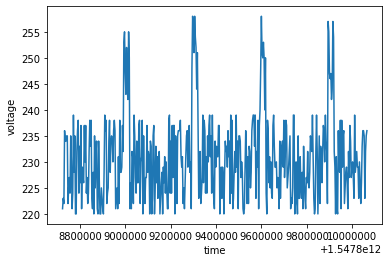

In [35]:
result = spark.sql(
"""
select voltage,ts from washing 
    where voltage is not null and 
    ts > 1547808720911 and
    ts <= 1547810064867+3600000
    order by ts asc
""")
result_rdd = result.rdd.map(lambda row : (row.ts,row.voltage))
result_array_ts = result_rdd.map(lambda ts_voltage: ts_voltage[0]).collect()
result_array_voltage = result_rdd.map(lambda ts_voltage: ts_voltage[1]).collect()
plt.plot(result_array_ts,result_array_voltage)
plt.xlabel("time")
plt.ylabel("voltage")
plt.show()

The run chart preserves the time domain, so we can see the time and volt relationships in time

### Scatter Plots:
Scatter plots don't draw lines, they put individual data points to a 2 or 3 dimensional vector space.<br>Each point is reflecting a row in a data set and,<br>Each dimension reflects a column. Scatter plots can be used to define classification boundaries between 2 IOT events for example. Or clusters of similar data, or detecting outliers from normal behavior. 

For this scatter plot, we want to plot the values for the hardness, temperature and flowrate dimensions of the washing table or Dataframe.

In [0]:
# First we run the spark.sql select statement for the three cols we want to display.
result = spark.sql('select hardness,temperature,flowrate from washing where hardness is not null and temperature is not null and flowrate is not null')
# Next we use the underlying rdd attribute to sample the data and choose the columns we need
result_array = result.rdd.sample(False,0.1).map(lambda row: (row.hardness, row.temperature, row.flowrate))

In [24]:
# let's see the first 10 values
result_array.take(10)

[(73, 84, 11),
 (79, 96, 11),
 (80, 89, 11),
 (125, 88, 11),
 (72, 81, 11),
 (80, 80, 11),
 (75, 91, 11),
 (79, 86, 11),
 (72, 89, 11),
 (130, 94, 11)]

Next let's unpack the hardness, temperature and flowrate columns into separate arrays or lists

In [25]:
hardness_arr = result_array.map(lambda hardness_temperaure_flowrate: hardness_temperaure_flowrate[0]).collect()
# Let's see the first 5 values
hardness_arr[:5]

[73, 79, 80, 125, 72]

In [26]:
temp_arr = result_array.map(lambda hardness_temperaure_flowrate: hardness_temperaure_flowrate[1]).collect()
# Let's see the first 5 values
temp_arr[:5]

[84, 96, 89, 88, 81]

In [27]:
flowrate_arr = result_array.map(lambda hardness_temperaure_flowrate: hardness_temperaure_flowrate[2]).collect()
# Let's see the first 5 values
flowrate_arr[:5]

[11, 11, 11, 11, 11]

Now let's plot the 3D plot of our data


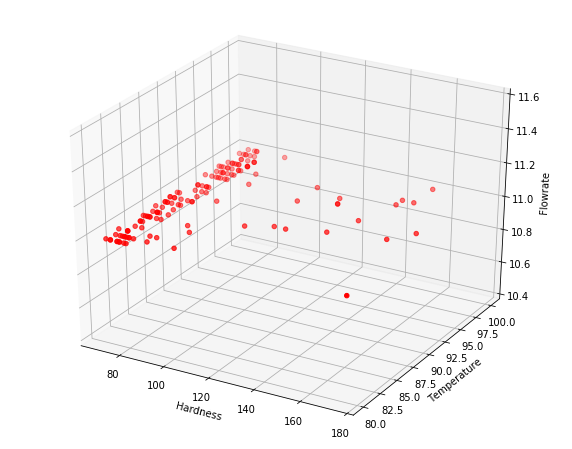

In [28]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(hardness_arr, temp_arr,flowrate_arr, c='r', marker='o')
ax.set_xlabel('Hardness')
ax.set_ylabel('Temperature')
ax.set_zlabel('Flowrate')
plt.show()

You will notice that the individual points resemble in some sort of plane. But this is not a surprise. Actually we can draw the following conclusions from the plot:

most of the data points are lying around hardness 60-80, temperature 80-100 and flowrate 80-100
there are some outliers, especially when it comes to the range of hardness 100-200

The data follows some narrow boundaries
So lets double-check what's going on with hardness since it seems that it really sticks around 60-80 and very seldom creates values above that. We can use a histogram for that which bins together certain value ranges and counts the frequency of occurences of values within this range. Those frequencies are ordered and shown as a bar diagram, so let's plot it:

### Histograms

Using Histograms, we can get an idea of the distribution of values within a single dimension. we can find regions of high and low value concentration within that particular dimension.<br>.Let's quickly plot the hardness array

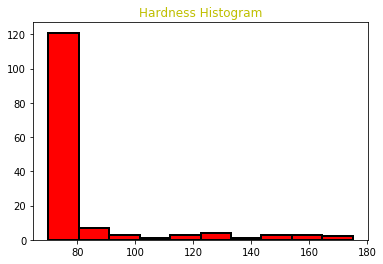

In [29]:
plt.hist(hardness_arr, color='r', edgecolor='black', linewidth=2)
plt.title('Hardness Histogram', color='y')
plt.show()

As with the scatter plot, we can see that hardness values are concentrated around 80, with a very low amount of exceptions.

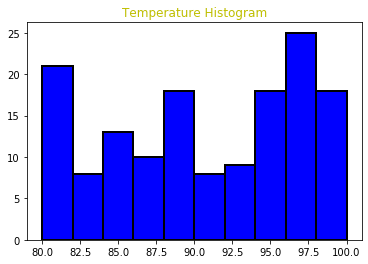

In [30]:
# Let's plot temperature
plt.hist(temp_arr, color='blue', edgecolor='black', linewidth=2)
plt.title('Temperature Histogram',color='y')
plt.show()

Temperature on the other hand is very evenly distributed with a peak around 100

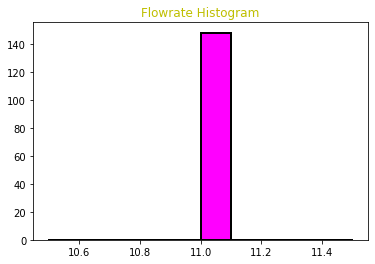

In [31]:
# Let's plot flowrate
plt.hist(flowrate_arr, color='magenta', edgecolor='black', linewidth=2)
plt.title('Flowrate Histogram',color='y')
plt.show()

Just as we observed from the scatter plot, all values in the flowrate are 1. This is a unimodal distribution with only one value

## Summary:

Low dimensional Data can be plotted using charts. we can easily visualize 1, 2 or 3 dimensional data at the same time.<br>
Many statistical moments and properties can be visually represented using plots.
<br>.Every plot has its clear purpose, but playing around with diff plots helps us to get more insight about our data set.

We can look at the [ibm_notebook](https://github.com/IBM/coursera/blob/master/coursera_ds/a0_m4_exercice3.1_spark2.3_python3.5_cos.ipynb) for this exercise.